./traj/2024-03-16_13-54-32.txt
elapsed
2458
dxl_pos[0]
2458
dxl_pos[1]
2458
dxl_pos[2]
2458
dxl_pos[3]
2458
dxl_pos[4]
2458
servos[0]
2458
servos[1]
2458
servos[2]
2458
servos[3]
2458
servos[4]
2458


interactive(children=(IntSlider(value=0, description='start_index', max=2457), IntSlider(value=2457, descripti…

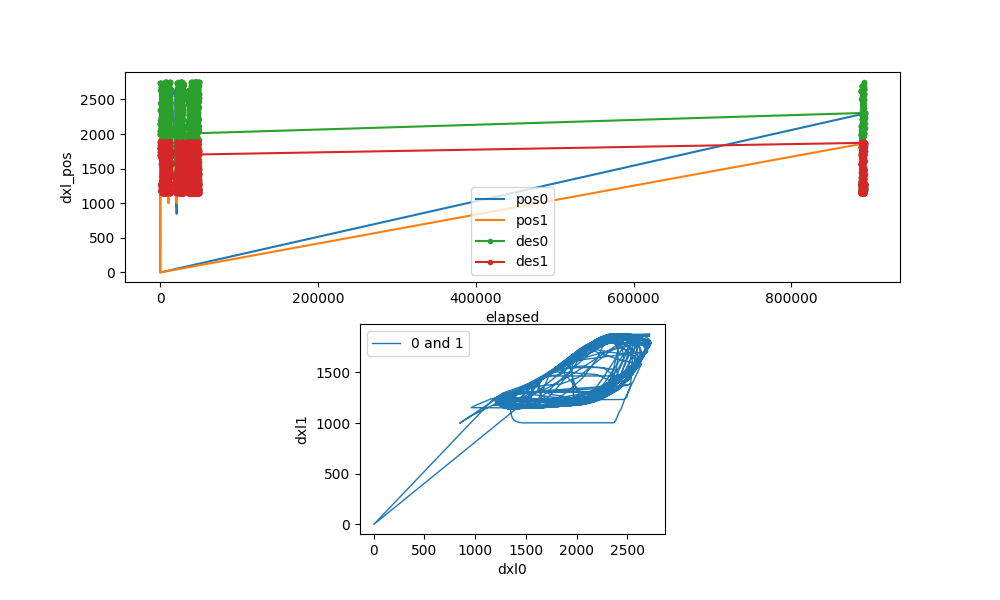

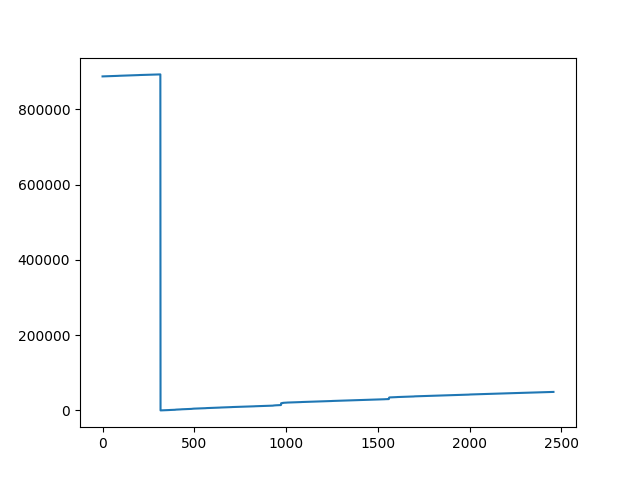

In [80]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import glob
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

list_of_files = [f for f in glob.glob('./traj/*') if not os.path.isdir(f)] #take all files but not folders
latest_file = max(list_of_files, key=os.path.getctime)

file_path = latest_file
# file_path = "./traj/jerkybrainside.txt"
print(latest_file)

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

labels = [
    'elapsed', 
    'dxl_pos[0]', 'dxl_pos[1]', 'dxl_pos[2]', 'dxl_pos[3]', 'dxl_pos[4]',
    'servos[0]', 'servos[1]', 'servos[2]', 'servos[3]', 'servos[4]',
]
data_dict = {label: [] for label in labels}

last_delimiter_index = 0

messages = []
for i in range(len(lines)):
    if(lines[i].startswith('\n')):
        messages.append(lines[last_delimiter_index:i])
        last_delimiter_index = i
        # print("found ", i)

for message in messages:
    # print("message")
    # message_dict = dict.fromkeys(labels, [])
    message_dict = {label: [] for label in labels}
    for label in labels:
        for line in message:
                if(line.startswith(label)):
                    # print("append ", label, float(line.split(':')[1]))
                    message_dict[label].append(float(line.split(':')[1]))
                    # print(message_dict[label])
    # print(message_dict)
    full = True
    for key in message_dict:
        if(len(message_dict[key]) == 0):
            # print(message_dict)
            full=False
            break
    if(full):
        for label in labels:
            # print((message_dict[label]))
            data_dict[label].append(message_dict[label][0])
    
    # if(len)


for series in data_dict:
    print(series)
    print(len(data_dict[series]))

# Create a dataframe from the extracted values
df_raw = pd.DataFrame(data_dict)
df = None #cropped version

plt.close('all')

plt.figure()
plt.plot(df_raw['elapsed'])
# print(df_raw['elapsed'].values)

fig, axs = plt.subplots(2, 1, figsize=(10,6))
@interact(start_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=0),
          end_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=len(df_raw)-1))
def display_image(start_index, end_index):
    if(start_index >= end_index):
        return

    global df
    df = df_raw[start_index:end_index]
    
    axs[0].clear()
    axs[0].set_xlabel('elapsed')
    axs[0].set_ylabel('dxl_pos')
    for i in range(2):
        axs[0].plot(df['elapsed'], df[f'dxl_pos[{i}]'], label=f'pos{i}')
    for i in range(2):
        axs[0].plot(df['elapsed'], df[f'servos[{i}]'], '.-', label=f'des{i}')
    axs[0].legend()

    axs[1].clear()
    axs[1].set_xlabel('dxl0')
    axs[1].set_ylabel('dxl1')
    # axs[1].scatter(df['dxl_pos[0]'], df['dxl_pos[1]'], c=df['elapsed'], s=2, label=f'0 and 1')
    axs[1].plot(df['dxl_pos[0]'], df['dxl_pos[1]'], '-', linewidth=1, label=f'0 and 1')
    axs[1].legend()
    axs[1].set_aspect('equal', adjustable='box')
plt.show()